# Sample using Github Event Data for Analysis

In [19]:
import pandas as pd
from fidap import fidap_client
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
fidap = fidap_client(db='sf', api_key="b8a8ebb5f4cf4983a4fa63be6ca418c2")

# Github Event Questions

## How many PR's were made in the current month of February?

In [36]:
count_prs = fidap.sql("""select count(*) as number_of_prs from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PullRequestEvent'""")
print(f'There were {count_prs.values[0][0]} PRs made in this month so far.')

There were 3308118 PRs made in this month so far.


## Which Users Made the most PR's this month (excluding bots or users with bot in their names)?

In [22]:
users_prs = fidap.sql("""select count(*) as number_of_prs, "username" from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PullRequestEvent' and "username" not like '%bot%' group by "username" order by number_of_prs desc;""")

### Table of Top 5 Users

In [32]:
users_prs.head(5)

,number_of_prs,username
0,38611,direwolf-github
1,15209,satyanutella1
2,8816,satyanutella2
3,5300,chrisbarnatt
4,4661,mindustrykilla


### WordCloud of Top 50 Users

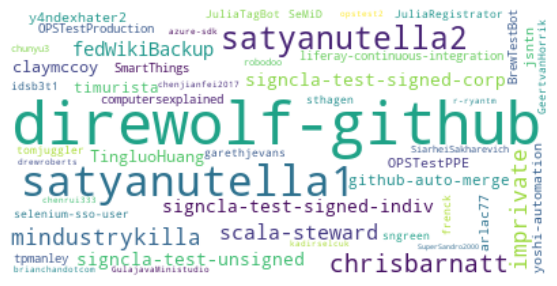

In [33]:
values = {}
for count, user in users_prs.values:
    values[user] = count
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white")
wordcloud.generate_from_frequencies(frequencies=values)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Which user made the most PR's to a particular Repo this month?

In [42]:
users_prs = fidap.sql("""select count(*) as number_of_prs, "username", "repo_name" from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PullRequestEvent' and "username" not like '%bot%' group by "repo_name", "username" order by number_of_prs desc;""")

### Table of Top 5 Users

In [45]:
users_prs.head(5)

,number_of_prs,username,repo_name
0,4661,mindustrykilla,Anuken/Mindustry
1,4494,imprivate,itsprivate/ts
2,2656,signcla-test-unsigned,google-test/signcla-probe-repo
3,2655,signcla-test-signed-corp,google-test/signcla-probe-repo
4,2654,signcla-test-signed-indiv,google-test/signcla-probe-repo


## How many Code Pushes were made in the current month of February?

In [38]:
count_push = fidap.sql("""select count(*) as number_of_prs from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PushEvent'""")
print(f'There were {count_push.values[0][0]} code pushes made in this month so far.')

There were 18517593 code pushes made in this month so far.


## Which users made the most code pushes to any repo?

In [50]:
users_pushes = fidap.sql("""select count(*) as number_of_pushes, "username" from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PushEvent' and "username" not like '%bot%' and "username" not like '%Bot%' group by "username" order by number_of_pushes desc;""")

### Table of Top Users

In [52]:
users_pushes.head(5)

,number_of_pushes,username
0,152674,commit-b0t
1,136013,breakingheatmap
2,85388,Dids
3,55198,Hall-1910
4,52807,direwolf-github


### Word Cloud of Top Code Pushers

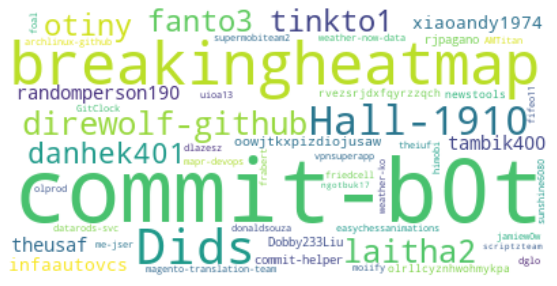

In [53]:
values = {}
for count, user in users_pushes.values:
    values[user] = count
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white")
wordcloud.generate_from_frequencies(frequencies=values)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()